<a href="https://colab.research.google.com/github/JakeOh/202110_itw_lab_python/blob/main/py26_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib의 폰트를 Nanum 폰트로 지정

In [232]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

## 한글 폰트 테스트

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.DataFrame(data={'구': ['강남구', '서초구'],
                        '가격': [100, 150]})
df

,구,가격
0,강남구,100
1,서초구,150


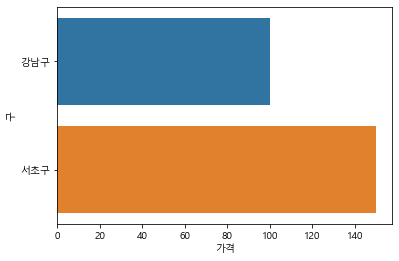

In [235]:
sns.barplot(x='가격', y='구', data=df)
plt.show()

# 아파트 매매가격 분석

*   [apt_201910.csv](https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv) 파일을 읽고 DataFrame 생성
    *   encoding 파라미터 설정
    *   '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
        *   '가격' 컬럼은 숫자 타입이어야 함!
*   데이터 프레임 파악
    *   info, head, tail, describe, dtypes, ...
*   '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    *   '강원도 강릉시 견소동' -> '강원도'
*   '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    *   201910 -> 2019, 10
*    서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
*    도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이  $84 m^2$  이상  $100 m^2$  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
*    면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    *   결과를 평균의 내림차순으로 정렬해서 출력
    *   결과를 최댓값의 내림차순으로 정렬해서 출력
    *   결과를 최솟값의 오름차순으로 정렬해서 출력

## 데이터 준비

In [236]:
# CSV 파일이 저장된 경로
file_path = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/apt_201910.csv'

In [237]:
# CSV 파일을 읽고 DataFrame 생성
apt = pd.read_csv(file_path, encoding='cp949', thousands=',')
#> thousands=',': 숫자의 1000자리 구분자로 ','가 사용됨.

파일 인코딩 타입

* utf-8: Liux, MacOS 등 대부분의 OS에서 텍스트의 기본 인코딩
* cp949: 한글 MS-Windows에서 텍스트의 기본 인코딩
* cp1252: 영문 MS-Widnows에서 텍스트의 기본 인코딩

In [238]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [239]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [240]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


## 숫자 타입 변수들 기술 통계량

In [241]:
apt[['면적', '가격', '층', '건축년도']].describe()

,면적,가격,층,건축년도
count,42758.000000,42758.000000,42758.000000,42758.000000
mean,75.990614,31719.163946,9.614575,2002.652252
std,24.816118,26001.893045,6.582509,9.716009
min,10.020000,600.000000,-1.000000,1962.000000
25%,59.820000,15500.000000,4.000000,1995.000000
50%,82.536900,25400.000000,9.000000,2003.000000
75%,84.961200,40000.000000,13.000000,2011.000000
max,291.336000,485000.000000,70.000000,2019.000000


## 기술 통계량 시각화

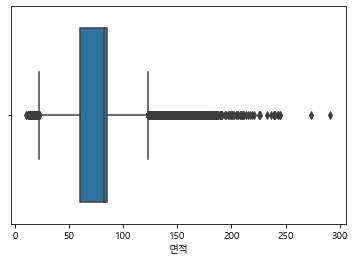

In [242]:
# 아파트 면적 시각화
sns.boxplot(x='면적', data=apt)
plt.show()

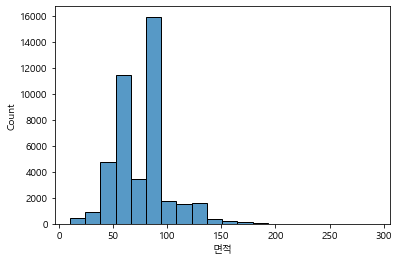

In [243]:
sns.histplot(x='면적', data=apt, bins=20)  # 히스토그램
plt.show()

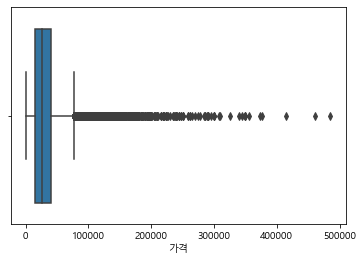

In [244]:
# 가격 시각화
sns.boxplot(x='가격', data=apt)
plt.show()

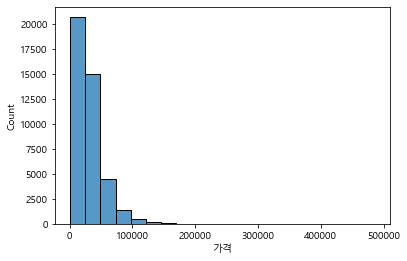

In [245]:
sns.histplot(x='가격', data=apt, bins=20)
plt.show()

## 파생 변수 추가

* province: 광역시도
* year: 매매 연도
* month: 매매 월

In [246]:
apt['province'] = apt['시군구'].str.split().str[0]

In [247]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도


In [248]:
apt['province'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [249]:
apt['province'].value_counts()

경기도        12126
서울특별시       4701
경상남도        2955
인천광역시       2761
부산광역시       2752
대전광역시       2487
충청남도        2045
경상북도        1985
대구광역시       1969
광주광역시       1588
충청북도        1576
울산광역시       1562
전라북도        1394
전라남도        1234
강원도         1143
세종특별자치시      315
제주특별자치도      165
Name: province, dtype: int64

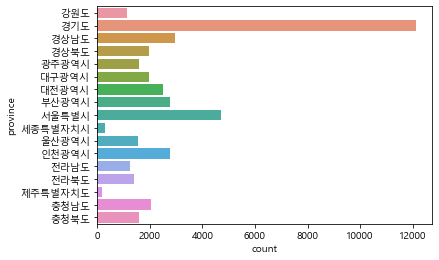

In [250]:
sns.countplot(y='province', data=apt)
plt.show()

In [251]:
# 시/군/구 파생변수
apt['county'] = apt['시군구'].str.split().str[1]

In [252]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시


In [253]:
apt['county'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [254]:
apt['dong'] = apt['시군구'].str.split().str[2]

In [255]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동


In [256]:
apt['dong'].unique()

array(['견소동', '교동', '남문동', ..., '지현동', '칠금동', '호암동'], dtype=object)

In [257]:
apt['year'] = apt['계약년월'] // 100  # 몫
apt['month'] = apt['계약년월'] % 100  # 나머지

In [258]:
apt.head()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,견소동,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,견소동,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10


In [259]:
apt['year'].unique()

array([2019], dtype=int64)

In [260]:
apt['month'].unique()

array([10], dtype=int64)

## 광역시도별 분석

In [261]:
# 광역시도별 아파트 매매가격의 개수, 평균, 최솟값, 최댓값
result = apt.groupby(by='province')['가격'].agg(['count', 'mean', 'min', 'max'])

In [262]:
# 결과를 매매가격 평균의 내림차순 정렬
top10 = result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
경기도,12126,36447.593765,2700,262000
세종특별자치시,315,33577.206349,2880,82200
인천광역시,2761,30196.960884,4000,300000
부산광역시,2752,29593.587209,1500,376640
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
울산광역시,1562,26581.768246,4000,81000
제주특별자치도,165,25878.181818,6000,76500


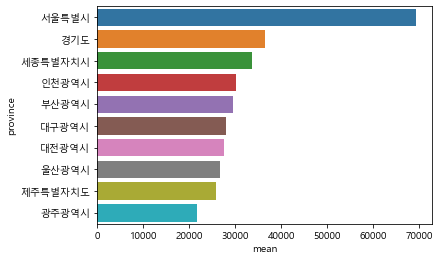

In [263]:
sns.barplot(x='mean', y=top10.index, data=top10)
plt.show()

In [264]:
top10 = result.sort_values(by='max', ascending=False).head(n=10)
top10

,count,mean,min,max
province,,,,
서울특별시,4701,69302.919166,8500,485000
부산광역시,2752,29593.587209,1500,376640
인천광역시,2761,30196.960884,4000,300000
경기도,12126,36447.593765,2700,262000
대구광역시,1969,28031.251397,1500,173500
대전광역시,2487,27591.418979,2400,150000
광주광역시,1588,21786.904282,4150,115000
충청북도,1576,18068.494289,1100,96000
충청남도,2045,17494.407824,1500,90000


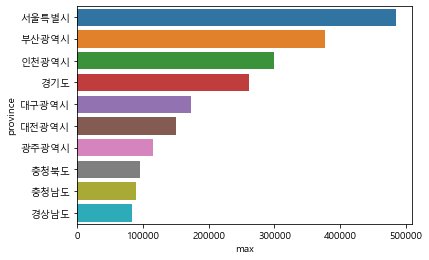

In [265]:
sns.barplot(x='max', y=top10.index, data=top10)
plt.show()

In [266]:
bottom10= result.sort_values(by='min').head(n=10)  # ascending의 기본값은 True: 오름차순 정렬
bottom10

,count,mean,min,max
province,,,,
경상북도,1985,15304.175819,600,50000
전라북도,1394,14655.274032,900,68700
강원도,1143,14305.559930,950,45800
충청북도,1576,18068.494289,1100,96000
전라남도,1234,14523.552674,1330,61800
대구광역시,1969,28031.251397,1500,173500
부산광역시,2752,29593.587209,1500,376640
충청남도,2045,17494.407824,1500,90000
대전광역시,2487,27591.418979,2400,150000


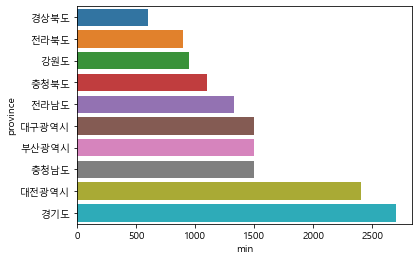

In [267]:
sns.barplot(x='min', y=bottom10.index, data=bottom10)
plt.show()

## 면적이 84㎡ 이상 100㎡ 미만인 아파트 거래 가격 분석

In [268]:
apt_midsize=apt[(apt['면적']>=84) & (apt['면적']<100)]
apt_midsize.shape
apt_midsize.head()


,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.9900,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,견소동,2019,10
5,강원도 강릉시 교동,1984,1984,0,강릉 교동 풍림아이원 아파트,84.9964,201910,5,29200,14,2017,화부산로40번길 29,강원도,강릉시,교동,2019,10
9,강원도 강릉시 교동,1750,1750,0,교동1주공,84.8400,201910,18,21550,9,1999,가작로 78,강원도,강릉시,교동,2019,10


In [269]:
len(apt_midsize)

15704

In [270]:
result=apt_midsize.groupby(by='province')['가격'].agg(['count','mean','min','max'])

In [271]:
top10=result.sort_values(by="count", ascending=False).head(10)

<AxesSubplot:xlabel='count', ylabel='province'>

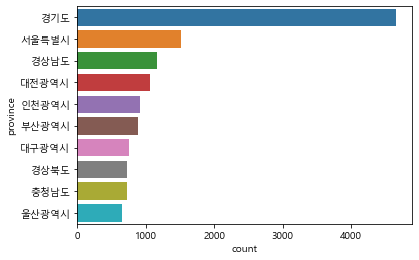

In [272]:
sns.barplot(data=top10, x='count', y=top10.index)

In [273]:
# 중간 크기 아파트의 매매가격 평균 순위
top10=result.sort_values(by='mean', ascending=False).head(n=10)

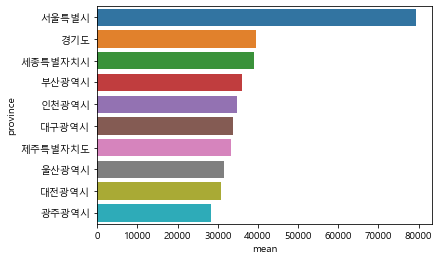

In [274]:
sns.barplot(data=top10, x='mean', y=top10.index)
plt.show()

In [275]:
# 광역시도별 매매 가격 최댓값
top10=result.sort_values(by='max', ascending=False).head(10)

<AxesSubplot:xlabel='max', ylabel='province'>

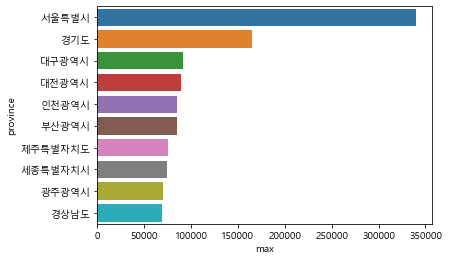

In [276]:
sns.barplot(data=top10, x='max', y=top10.index)

## 서울 아파트 가격 분석

In [277]:
seoul_apt=apt[apt['province'].str.contains('서울')]
seoul_apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27005,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,41.98,201910,1,180000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27006,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,35.64,201910,2,153000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27007,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,3,205000,4,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27008,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,42.55,201910,4,207000,2,1982,개포로 310,서울특별시,강남구,개포동,2019,10
27009,서울특별시 강남구 개포동,141,141,0,개포주공 1단지,50.64,201910,12,270000,5,1982,개포로 310,서울특별시,강남구,개포동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31701,서울특별시 중랑구 중화동,42,42,0,중화동건영아파트,59.94,201910,12,27000,12,1998,동일로140길 88,서울특별시,중랑구,중화동,2019,10
31702,서울특별시 중랑구 중화동,19-16,19,16,한솔e(A동),71.34,201910,3,34000,3,2004,봉화산로27길 30,서울특별시,중랑구,중화동,2019,10
31703,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,12,45500,25,1997,동일로 752,서울특별시,중랑구,중화동,2019,10
31704,서울특별시 중랑구 중화동,450,450,0,한신1차,59.76,201910,16,45700,24,1997,동일로 752,서울특별시,중랑구,중화동,2019,10


In [278]:
seoul_apt['county'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [279]:
seoul_apt['dong'].unique()

array(['개포동', '논현동', '대치동', '도곡동', '삼성동', '세곡동', '수서동', '신사동', '압구정동',
       '역삼동', '일원동', '자곡동', '청담동', '강일동', '고덕동', '길동', '둔촌동', '명일동',
       '상일동', '성내동', '암사동', '천호동', '미아동', '번동', '수유동', '우이동', '가양동',
       '공항동', '내발산동', '등촌동', '마곡동', '방화동', '염창동', '화곡동', '남현동', '봉천동',
       '신림동', '광장동', '구의동', '군자동', '자양동', '중곡동', '개봉동', '고척동', '구로동',
       '궁동', '신도림동', '오류동', '온수동', '천왕동', '항동', '가산동', '독산동', '시흥동',
       '공릉동', '상계동', '월계동', '중계동', '하계동', '도봉동', '방학동', '쌍문동', '창동',
       '답십리동', '신설동', '용두동', '이문동', '장안동', '전농동', '제기동', '청량리동', '회기동',
       '휘경동', '노량진동', '대방동', '동작동', '본동', '사당동', '상도동', '신대방동', '흑석동',
       '공덕동', '노고산동', '대흥동', '도화동', '마포동', '망원동', '상수동', '상암동', '서교동',
       '성산동', '신공덕동', '신정동', '아현동', '염리동', '용강동', '중동', '창전동', '합정동',
       '현석동', '남가좌동', '대현동', '북가좌동', '북아현동', '연희동', '영천동', '창천동', '천연동',
       '충정로3가', '합동', '현저동', '홍은동', '홍제동', '반포동', '방배동', '서초동', '양재동',
       '우면동', '잠원동', '금호동1가', '금호동2가', '금호동3가', '금호동4가', '마장동', '상왕십리동',
       '성수동

In [280]:
# 서울시 구별 아파트 매매 건수 ,매매 가격 평균 ,최솟값, 최댓값
result=seoul_apt.groupby('county')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
county,,,,
강남구,146,156752.739726,20500,461000
강동구,254,76776.259843,9000,175000
강북구,82,50530.487805,19500,88000
강서구,276,58559.420290,10200,133000
관악구,166,53410.228916,13000,89900
광진구,132,95781.060606,25500,185000
구로구,331,52736.495468,9500,136500
금천구,149,42771.664430,9000,93000
노원구,499,42058.597194,8500,97000


In [281]:
# 서울시 구별 아파트 매매 거래 수 순위
top10=result.sort_values(by='count', ascending=False).head(10)


<AxesSubplot:xlabel='count', ylabel='county'>

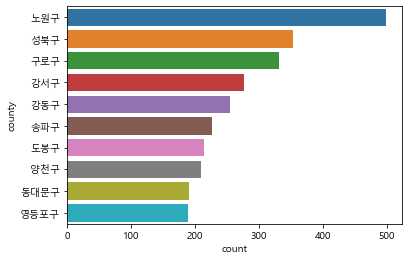

In [282]:
sns.barplot(data=top10, x='count', y=top10.index)

In [283]:
# 서울시 구별 아파트 매매 가격 평균
top10=result.sort_values(by="mean", ascending=False).head(10)

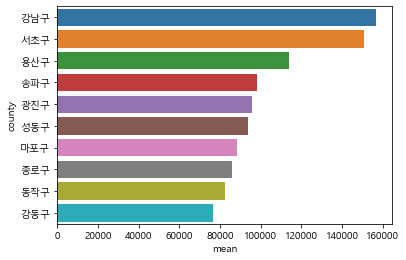

In [284]:
sns.barplot(data=top10, x='mean', y=top10.index)
plt.show()

In [287]:
top10=result.sort_values(by='max', ascending=False).head(10)

<AxesSubplot:xlabel='max', ylabel='county'>

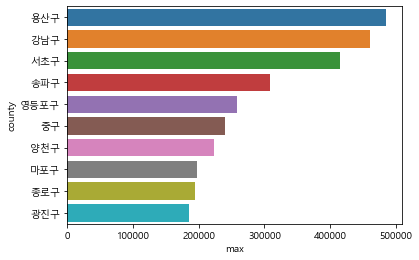

In [289]:
sns.barplot(data=top10, x='max', y=top10.index)

## 서울시 동별 아파트 가격 분석

In [298]:
result=seoul_apt.groupby(by='dong')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
dong,,,,
가락동,22,78695.454545,16000,110000
가산동,6,40550.000000,20300,53500
가양동,43,49988.372093,33500,114000
갈현동,5,38400.000000,27000,60000
강일동,19,67026.315789,58500,85000
...,...,...,...,...
회현동1가,3,125500.000000,113000,143500
효창동,6,87500.000000,59000,130000
후암동,3,78066.666667,30200,129000


In [306]:
top10=result.sort_values(by='count', ascending=False).head(10)
top10

,count,mean,min,max
dong,,,,
상계동,198,40474.242424,23200,78000
구로동,120,47075.250000,9800,118000
중계동,108,46145.740741,16300,97000
시흥동,101,39634.435644,9000,86000
봉천동,97,56228.340206,13000,89900
신월동,78,41164.102564,17500,79000
공릉동,78,37887.179487,8500,71500
신정동,77,74342.207792,29950,176000
창동,76,44913.815789,18700,88000


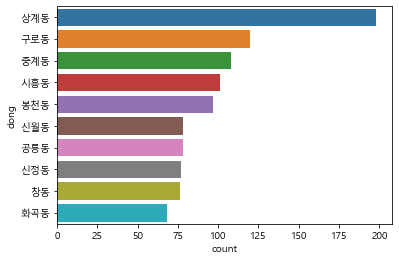

In [307]:
sns.barplot(data=top10, x='count', y=top10.index)
plt.show()

In [315]:
# 매매 가격 평균 순위
result.sort_values(by='mean',ascending=False).head(10)


,count,mean,min,max
dong,,,,
압구정동,10,263250.000000,170000,355000
반포동,17,224200.000000,87700,415000
잠원동,15,194313.333333,109000,295000
대치동,22,192795.454545,30000,373000
잠실동,22,191459.090909,145000,308000
홍파동,2,176500.000000,159000,194000
한강로3가,1,175000.000000,175000,175000
여의도동,8,172562.500000,105000,259000
청담동,10,170200.000000,75000,300000


In [319]:
# 매매 건수가 20건 이상인 동에서 매매 가격 평균 순위
top10=result[result['count']>=20].sort_values(by="mean", ascending=False).head(10)
top10

,count,mean,min,max
dong,,,,
대치동,22,192795.454545,30000,373000
잠실동,22,191459.090909,145000,308000
도곡동,23,169347.826087,31800,461000
방배동,31,142812.903226,57000,250000
개포동,21,137223.809524,60700,270000
이촌동,20,136027.400000,25000,289998
서초동,45,131484.444444,22500,261000
역삼동,22,130213.636364,20500,245000
고덕동,23,106947.826087,52200,150000


<AxesSubplot:xlabel='mean', ylabel='dong'>

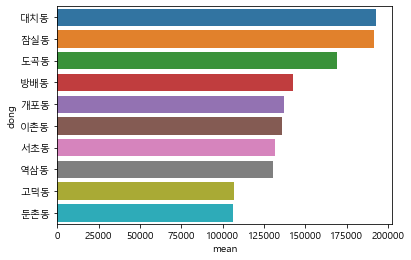

In [320]:
sns.barplot(data=top10, x='mean', y=top10.index)

In [323]:
top10=result.sort_values(by='max', ascending=False).head(n=10)
top10


,count,mean,min,max
dong,,,,
한남동,6,159666.666667,27000,485000
도곡동,23,169347.826087,31800,461000
반포동,17,224200.000000,87700,415000
대치동,22,192795.454545,30000,373000
압구정동,10,263250.000000,170000,355000
잠실동,22,191459.090909,145000,308000
청담동,10,170200.000000,75000,300000
잠원동,15,194313.333333,109000,295000
삼성동,7,168714.285714,103000,290000


<AxesSubplot:xlabel='max', ylabel='dong'>

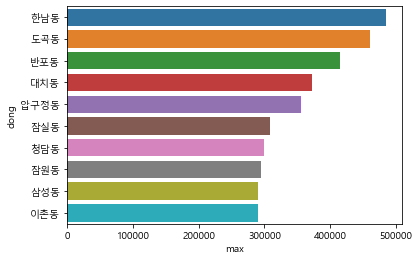

In [324]:
sns.barplot(data=top10, x='max', y=top10.index)

### 서울시 중형 크기의 아파트 가격 분석


$ 84 m^2$ 이상 $100 m^2$ 미만

In [334]:
seoul_midsize=seoul_apt[(seoul_apt['면적']>= 84) & (seoul_apt['면적']<100)]
seoul_midsize

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,dong,year,month
27027,서울특별시 강남구 논현동,80-13,80,13,프라임,97.8000,201910,1,93000,4,2004,도산대로30길 56,서울특별시,강남구,논현동,2019,10
27030,서울특별시 강남구 대치동,1014-3,1014,3,대치삼성,84.5800,201910,17,190000,3,2000,도곡로78길 22,서울특별시,강남구,대치동,2019,10
27033,서울특별시 강남구 대치동,988-4,988,4,대치효성,84.9100,201910,6,159000,5,1999,삼성로64길 12,서울특별시,강남구,대치동,2019,10
27037,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,84.9700,201910,14,277000,35,2015,삼성로51길 37,서울특별시,강남구,대치동,2019,10
27038,서울특별시 강남구 대치동,1027,1027,0,래미안대치팰리스,91.9300,201910,20,275000,23,2015,삼성로51길 35,서울특별시,강남구,대치동,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,서울특별시 중랑구 신내동,801,801,0,영풍마드레빌,84.8485,201910,12,55500,6,2004,용마산로129가길 41,서울특별시,중랑구,신내동,2019,10
31692,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,41000,1,1996,봉화산로56길 123,서울특별시,중랑구,신내동,2019,10
31693,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,7,43000,5,1996,봉화산로56길 145-1,서울특별시,중랑구,신내동,2019,10
31694,서울특별시 중랑구 신내동,479,479,0,중앙하이츠,84.9700,201910,11,44300,9,1996,봉화산로56길 123,서울특별시,중랑구,신내동,2019,10


In [341]:
# 서울시 중형 아파트 구별
result=seoul_midsize.groupby(by='county')['가격'].agg(['count','mean','min','max'])
result

,count,mean,min,max
county,,,,
강남구,35,156277.142857,93000,277000
강동구,104,86512.692308,40000,175000
강북구,25,56340.000000,38000,87000
강서구,83,75020.481928,36900,126500
관악구,51,62277.450980,40750,80500
광진구,54,99011.111111,48000,130000
구로구,106,62302.358491,35300,124800
금천구,41,55573.170732,34300,93000
노원구,72,56870.138889,28000,90000


In [344]:
# 매매 건수 상위 10개 구
top10=result.sort_values(by='count', ascending=False).head(n=10)

<AxesSubplot:xlabel='count', ylabel='county'>

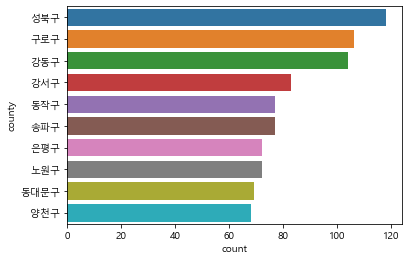

In [345]:
sns.barplot(data=top10, x='count', y=top10.index)

In [350]:
# 서울시 중형 아파트 구별 매매 가격 평균
top10=result.sort_values(by='mean', ascending=False).head(n=10)
top10

,count,mean,min,max
county,,,,
서초구,40,158377.500000,61800,340000
강남구,35,156277.142857,93000,277000
용산구,20,122880.000000,66000,183000
성동구,66,103028.030303,64900,150000
송파구,77,100422.077922,48500,195000
광진구,54,99011.111111,48000,130000
마포구,53,96716.981132,55000,154000
종로구,21,94328.571429,59700,159000
동작구,77,90848.051948,44000,130000


<AxesSubplot:xlabel='mean', ylabel='county'>

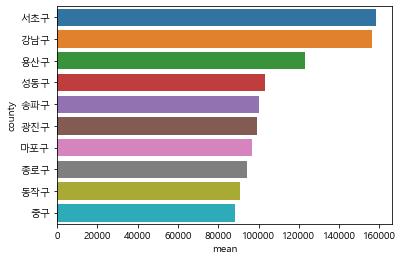

In [351]:
sns.barplot(data=top10, x='mean', y=top10.index)